In [18]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import cv2
from utils import get_meta

db = "wiki"
# db = "imdb"
mat_path = "data/{}_crop/{}.mat".format(db, db)
full_path, dob, gender, photo_taken, face_score, second_face_score, age\
    = get_meta(mat_path, db)

In [19]:
print("#images: {}".format(len(face_score)))
print("#images with inf scores: {}".format(np.isinf(face_score).sum()))

#images: 62328
#images with inf scores: 18016


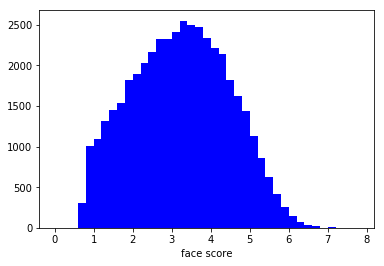

In [33]:
hist = plt.hist(face_score[face_score>0], bins=np.arange(0, 8, 0.2), color='b')
plt.xlabel("face score")

In [21]:
print("#images with second face scores: {}".format((~np.isnan(second_face_score)).sum()))

#images with second face scores: 4096


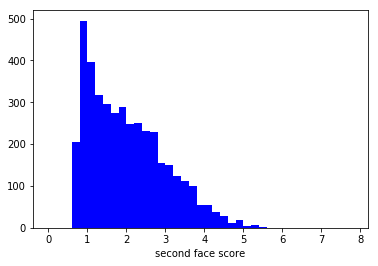

In [34]:
hist = plt.hist(second_face_score[~np.isnan(second_face_score)], bins=np.arange(0, 8, 0.2), color='b')
plt.xlabel("second face score")

In [23]:
cols, rows = 4, 3
img_num = cols * rows
path_root = "data/{}_crop/".format(db)


def show_imgs(img_paths):
    img_ids = np.random.choice(len(img_paths), img_num, replace=False)

    for i, img_id in enumerate(img_ids):
        plt.subplot(rows, cols, i + 1)
        img = cv2.imread(path_root + str(img_paths[img_id]))
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
    
    plt.show()

In [24]:
img_paths = []

for i in range(len(face_score)):
    if face_score[i] < 0.0:
        img_paths.append(full_path[i][0])

print("#images with scores lower than 0.0: {}".format(len(img_paths)))

#images with scores lower than 0.0: 18016


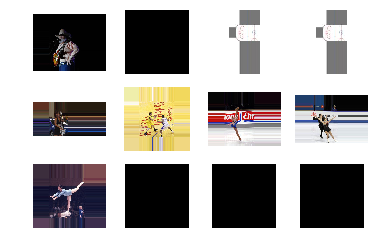

In [25]:
show_imgs(img_paths)

In [26]:
img_paths = []

for i in range(len(face_score)):
    if 0.0 < face_score[i] < 1.0:
        img_paths.append(full_path[i][0])

print("#images with scores lower than 1.0: {}".format(len(img_paths)))

#images with scores lower than 1.0: 1319


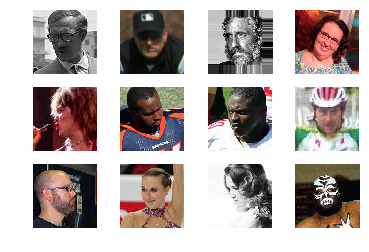

In [27]:
show_imgs(img_paths)

In [28]:
img_paths = []

for i in range(len(face_score)):
    if age[i] > 100:
        img_paths.append(full_path[i][0])

print("#images with ages greater than 100: {}".format(len(img_paths)))

#images with ages greater than 100: 493


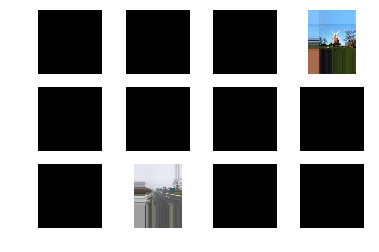

In [29]:
show_imgs(img_paths)

In [30]:
img_paths = []

for i in range(len(face_score)):
    if age[i] < 0.0:
        img_paths.append(full_path[i][0])

print("#images with scores lower than 0.0: {}".format(len(img_paths)))

#images with scores lower than 0.0: 1288


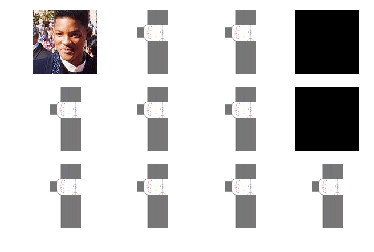

In [31]:
show_imgs(img_paths)